In [49]:
import numpy as np
import altair as alt
import pandas as pd
import scipy
from scipy.stats import beta
import math
import random

import matplotlib.pyplot as plt

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [50]:
k = 1000

In [51]:
B = 1000

In [52]:
def mle(data):
    return data

In [53]:
def james_stein(data):
    coef = max(
        0, 1 - ((len(data)-2)/sum(map(lambda x: x**2, data)))
    )
    return np.array([x*coef for x in data])

In [54]:
def mse(theta, theta_hat):
    return ((theta - theta_hat)**2).mean()

In [55]:
theta_vector = np.array([random.uniform(0, 1) for _ in range(k)])

In [56]:
mle_mse_list = np.empty(B)
js_mse_list = np.empty(B)
for i in range(B):
    data = np.array([np.random.normal(theta, 1) for theta in theta_vector])
    theta_hats_mle = mle(data)
    theta_hats_js = james_stein(data)
    mle_mse = mse(theta_vector, theta_hats_mle)
    js_mse = mse(theta_vector, theta_hats_js)
    mle_mse_list[i] = mle_mse
    js_mse_list[i] = js_mse

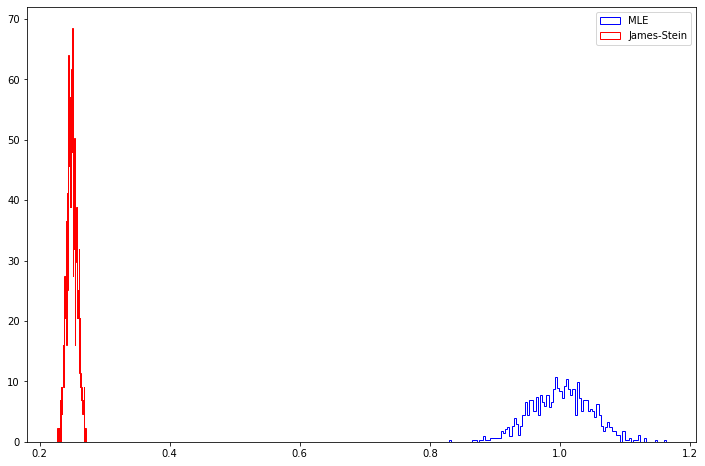

In [57]:
plt.figure(figsize=(12, 8))
plt.hist(mle_mse_list, density=True, bins=100, histtype='step', color='blue', label='MLE')
plt.hist(js_mse_list, density=True, bins=100, histtype='step', color='red', label='James-Stein')
plt.legend(loc='upper right')
plt.show();